# ElasticNet Regression (L1/L2 penalty)
* `simi5` -- ElasticNet, Coordinate Descent
* `simi6` -- ElasticNet, SGD


In [1]:
# add path
import sys; import os; sys.path.append(os.path.realpath("../"))

# general hyperparameter optimization settings
from seasalt import (select_the_best, refit_model) 
from seasalt.si import (cv_settings, scorerfun, print_scores)
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# demo datasets
from datasets.demo2 import X_train, Y_train, fold_ids, X_valid, Y_valid, meta as meta_data
#meta_data

In [3]:
# model implementations
#from potpourri.simi4 import model, hyper, meta  # Coordinate Descent
from potpourri.simi5 import model, hyper, meta  # SGD
meta

{'id': 'simi3',
 'name': 'LinReg ElasticNet',
 'descriptions': 'ElasticNet Regression (L1/L2 penalty), SGD solver, squared loss function.',
 'solver': 'Stochastic Gradient Descent',
 'active': True,
 'keywords': ['linear regression',
  'univariate regression',
  'multiple regression',
  'elasticnet',
  'sklearn.linear_model.SGDRegressor'],
 'output_num': 'single',
 'output_scale': 'interval',
 'output_dtype': 'float',
 'input_num': 'multi',
 'input_scale': 'interval',
 'input_dtype': 'float'}

## Train

In [4]:
%%time
rscv = RandomizedSearchCV(**{'estimator': model, 'param_distributions': hyper}, **cv_settings)
rscv.fit(X = X_train, y = Y_train)  # Run CV

bestparam, summary = select_the_best(rscv)  # find the "best" parameters
bestmodel = refit_model(model, bestparam, X_train, Y_train)  # Refit the "best" model

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


/Users/uh/cfs/venv-3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1.33 s, sys: 161 ms, total: 1.49 s
Wall time: 1min 1s


In [5]:
#rscv.cv_results_

## Evaluate

In [7]:
print("Infer/predict on validation set")
Y_pred = bestmodel.predict(X_valid)

print("\nOut of sample score")
print(scorerfun(Y_valid, Y_pred))

print("\nOut of sample score (Other metrics)")
print_scores(Y_pred, Y_valid)

print("\nBest model parameters")
print(bestparam)

print("\nIn-sample scores and model variants (from CV)")
summary

Infer/predict on validation set

Out of sample score
0.478584470601513

Out of sample score (Other metrics)
  Mean Squared Error:    2814.7615
 Mean Absolute Error:      41.8273
    Median Abs Error:      36.8159
           R Squared:      -0.0099
  Explained Variance:       0.0011

Best model parameters
{'lin__alpha': 0.09547033899179448, 'lin__l1_ratio': 0.7851759613930136}

In-sample scores and model variants (from CV)


,lin__alpha,lin__l1_ratio,cvratio,rank_test_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time
7,0.095470,0.785176,3.924284,1,0.457351,0.116544,0.467838,0.031766
4,0.040231,0.524756,3.859227,2,0.456822,0.118371,0.408558,0.067066
15,0.082896,0.325330,3.800167,4,0.455413,0.119840,0.713495,0.064425
26,0.099883,0.493796,3.760421,5,0.455403,0.121104,0.793612,0.114582
44,0.194025,0.728216,3.748746,3,0.455640,0.121545,0.624285,0.054197


### Parameters

In [8]:
bestmodel.steps[1][1].coef_

array([  1.50241351, -10.8730223 ,  28.09899589,  14.8239161 ,
       -25.46332473,   9.00811854,   0.        ,  13.12859587,
        23.71338116,   4.21729486])

### Target vs Predicted

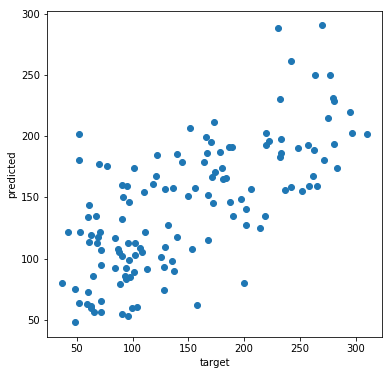

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(y=Y_pred, x=Y_valid);
#plt.scatter(x=np.log(Y_pred), y=np.log(Y_valid));
plt.xlabel('target');
plt.ylabel('predicted');

## Debug, Memory, Misc

In [10]:
#del summary
#locals()
%whos

Variable             Type                  Data/Info
----------------------------------------------------
RandomizedSearchCV   ABCMeta               <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
X_train              ndarray               309x10: 3090 elems, type `float64`, 24720 bytes
X_valid              ndarray               133x10: 1330 elems, type `float64`, 10640 bytes
Y_pred               ndarray               133: 133 elems, type `float64`, 1064 bytes
Y_train              ndarray               309: 309 elems, type `float64`, 2472 bytes
Y_valid              ndarray               133: 133 elems, type `float64`, 1064 bytes
bestmodel            Pipeline              Pipeline(memory=None,\n  <...>se=0, warm_start=True))])
bestparam            dict                  n=2
cv_settings          dict                  n=6
fold_ids             ndarray               309: 309 elems, type `int64`, 2472 bytes
hyper                dict                  n=2
meta                 dict      